In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd

# Load dataset from public GitHub repo
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=['label', 'message'])

# Map labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['message']
y = df['label']

# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.979372197309417

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



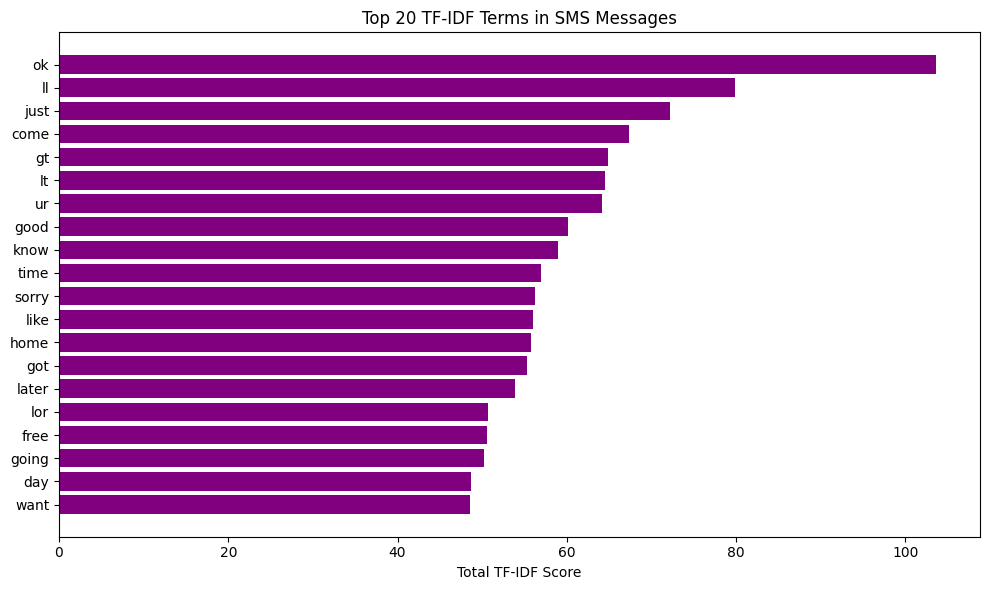

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sum TF-IDF values for each word across all documents
tfidf_sum = X_vec.sum(axis=0).A1  # Flatten the matrix
terms = vectorizer.get_feature_names_out()

# Create a DataFrame of terms and their total TF-IDF score
tfidf_df = pd.DataFrame({'term': terms, 'score': tfidf_sum})

# Sort by score and take top 20
top_tfidf = tfidf_df.sort_values(by='score', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_tfidf['term'][::-1], top_tfidf['score'][::-1], color='purple')
plt.xlabel('Total TF-IDF Score')
plt.title('Top 20 TF-IDF Terms in SMS Messages')
plt.tight_layout()
plt.show()


In [ ]:
# Separate the TF-IDF vectors based on class labels
spam_indices = df[df['label'] == 1].index
ham_indices = df[df['label'] == 0].index

# Spam TF-IDF matrix
spam_tfidf = X_vec[spam_indices]
spam_sum = spam_tfidf.sum(axis=0).A1
spam_terms = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'score': spam_sum})
top_spam = spam_terms.sort_values(by='score', ascending=False).head(15)

# Ham TF-IDF matrix
ham_tfidf = X_vec[ham_indices]
ham_sum = ham_tfidf.sum(axis=0).A1
ham_terms = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'score': ham_sum})
top_ham = ham_terms.sort_values(by='score', ascending=False).head(15)


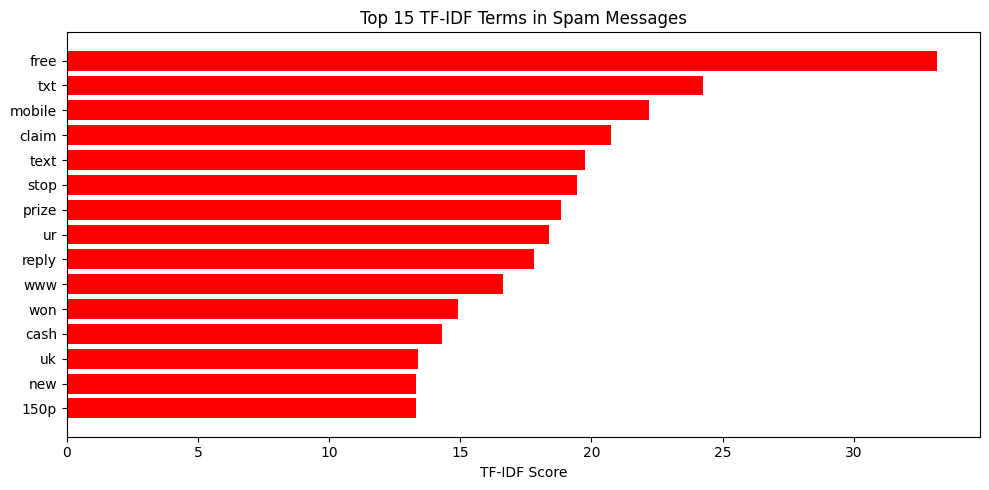

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(top_spam['term'][::-1], top_spam['score'][::-1], color='red')
plt.title("Top 15 TF-IDF Terms in Spam Messages")
plt.xlabel("TF-IDF Score")
plt.tight_layout()
plt.show()


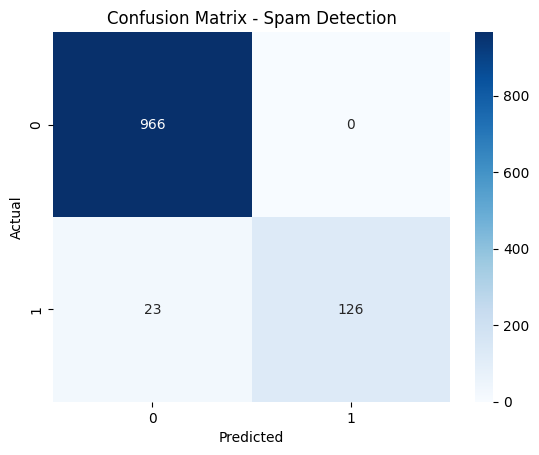

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Spam Detection')
plt.show()
